In [ ]:
# step-1
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas
from pandas.plotting import scatter_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#import the data file
df1=pd.read_csv("Solar_Prediction.csv")
print(df1)

         UNIXTime                   Data  ... TimeSunRise  TimeSunSet
0      1475229326  9-29-2016 12:00:00 AM  ...    06:13:00    18:13:00
1      1475229023  9-29-2016 12:00:00 AM  ...    06:13:00    18:13:00
2      1475228726  9-29-2016 12:00:00 AM  ...    06:13:00    18:13:00
3      1475228421  9-29-2016 12:00:00 AM  ...    06:13:00    18:13:00
4      1475228124  9-29-2016 12:00:00 AM  ...    06:13:00    18:13:00
...           ...                    ...  ...         ...         ...
32681  1480587604  12-1-2016 12:00:00 AM  ...    06:41:00    17:42:00
32682  1480587301  12-1-2016 12:00:00 AM  ...    06:41:00    17:42:00
32683  1480587001  12-1-2016 12:00:00 AM  ...    06:41:00    17:42:00
32684  1480586702  12-1-2016 12:00:00 AM  ...    06:41:00    17:42:00
32685  1480586402  12-1-2016 12:00:00 AM  ...    06:41:00    17:42:00

[32686 rows x 11 columns]


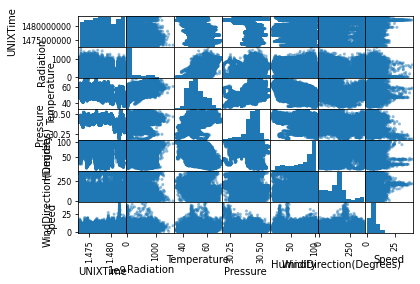

In [ ]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df1)
plt.show()

In [ ]:
#step 6
c=df1.corr(method='pearson')
print("The correlation matrix: ",c)

The correlation matrix:                          UNIXTime  Radiation  ...  WindDirection(Degrees)     Speed
UNIXTime                1.000000  -0.081286  ...                0.152613  0.173860
Radiation              -0.081286   1.000000  ...               -0.230324  0.073627
Temperature            -0.369169   0.734955  ...               -0.259421 -0.031458
Pressure               -0.332016   0.119016  ...               -0.229010 -0.083639
Humidity               -0.063117  -0.226171  ...               -0.001833 -0.211624
WindDirection(Degrees)  0.152613  -0.230324  ...                1.000000  0.073092
Speed                   0.173860   0.073627  ...                0.073092  1.000000

[7 rows x 7 columns]


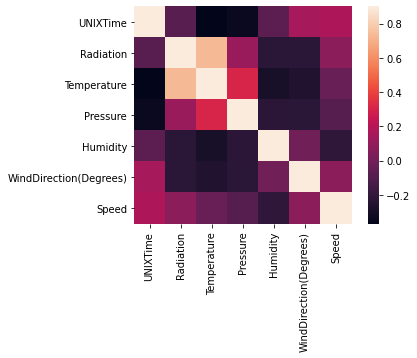

In [ ]:
#step -7

#Correlation map to see how features are correlated with radiation
corrmat = df1.corr()
plt.subplots()
#figsize=(12,9)
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [ ]:
# step-8
# TimeSunRise and TimeSunSet columns are used to find length of the day.
#It is then converted into seconds
# ie the length of the day is measured in seconds
time1=df1[['TimeSunRise']].values
time2=df1[['TimeSunSet']].values
i=0
DayLen=[]
for i in range(len(time1)):
    temp1=(int(time1[i][0][0:2])*3600+int(time1[i][0][3:5])*60+int(time1[i][0][6:8]))
    temp2=(int(time2[i][0][0:2])*3600+int(time2[i][0][3:5])*60+int(time2[i][0][6:8]))
    DayLen.append(temp2-temp1)
    
DayLen
df1['DayLengthinsec']=DayLen

In [ ]:
# step-9
# The time variable is converted into seconds.
#the time at which data was collected
time=df1[['Time']].values
#print(time[0][0][0:2]) #hour
#print(time[0][0][3:5]) #min
#print(time[0][0][6:8]) #second
i=0
TimeX=[]
for i in range(len(time)):
    temp=(int(time[i][0][0:2])*3600+int(time[i][0][3:5])*60+int(time[i][0][6:8]))
    TimeX.append(temp)

TimeX
df1['time_in_sec']=TimeX

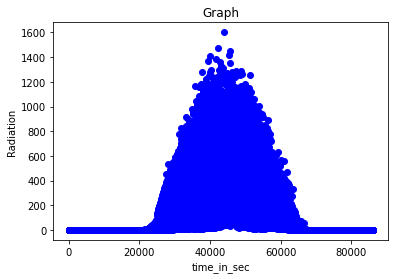

In [ ]:
# step-10
# graph is plotted between time and radiation
# it comes out as perfectly skewed

plt.scatter(df1.time_in_sec,df1.Radiation,color='blue')
plt.xlabel("time_in_sec")
plt.ylabel("Radiation")
plt.title("Graph")
plt.show()

In [ ]:
# step-12

model=smf.ols('Radiation ~ Temperature+ Humidity +Humidity*Temperature', df1) 
Fitting_results=model.fit() 
print(Fitting_results.summary().tables[1])

                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2336.4971     27.626    -84.575      0.000   -2390.646   -2282.349
Temperature             49.7311      0.515     96.473      0.000      48.721      50.741
Humidity                 9.8844      0.386     25.588      0.000       9.127      10.642
Humidity:Temperature    -0.1952      0.007    -26.356      0.000      -0.210      -0.181


In [ ]:
## step-13
# therefore we make it a new data frame
Temp_multiply_humid=df1.Humidity *df1.Temperature
df1['Temp_multiply_humid']=Temp_multiply_humid

In [ ]:
#step 14
df1['Month']=[d.split('/')[0] for d in df1.Data]
df1['Day_of_month']=[d.split('/')[0] for d in df1.Data]

In [ ]:
#step 15
df1['wind_dir'] = df1['WindDirection(Degrees)']

In [ ]:
#step 16
#We drop the following columns
df1 = df1.drop(['UNIXTime','Data','TimeSunRise','TimeSunSet','WindDirection(Degrees)'], axis=1)

In [ ]:
#step 17
#Transform the time_in_sec and month columns to integer labels

le = preprocessing.LabelEncoder()
df1.time_in_sec = le.fit_transform(df1.time_in_sec)
df1.Month = le.fit_transform(df1.Month)
df1.Day_of_month=le.fit_transform(df1.Day_of_month)

In [ ]:
#step 18
#We now check the data-set
print(df1.columns)

Index(['Time', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'Speed',
       'DayLengthinsec', 'time_in_sec', 'Temp_multiply_humid', 'Month',
       'Day_of_month', 'wind_dir'],
      dtype='object')


In [ ]:
#step 19
c=df1.corr(method='pearson')
print("The correlation matrix: ",c)

The correlation matrix:                       Radiation  Temperature  ...  Day_of_month  wind_dir
Radiation             1.000000     0.734955  ...     -0.041898 -0.230324
Temperature           0.734955     1.000000  ...     -0.032766 -0.259421
Pressure              0.119016     0.311173  ...     -0.212911 -0.229010
Humidity             -0.226171    -0.285055  ...      0.083375 -0.001833
Speed                 0.073627    -0.031458  ...     -0.050515  0.073092
DayLengthinsec        0.073456     0.355509  ...      0.254057 -0.129434
time_in_sec           0.013143     0.204372  ...      0.001925 -0.080159
Temp_multiply_humid  -0.020549     0.011732  ...      0.084407 -0.081217
Month                -0.041898    -0.032766  ...      1.000000  0.114155
Day_of_month         -0.041898    -0.032766  ...      1.000000  0.114155
wind_dir             -0.230324    -0.259421  ...      0.114155  1.000000

[11 rows x 11 columns]


In [ ]:
c=df1['Pressure'].corr(df1['Speed'])
print("The correlation matrix: ",c)

The correlation matrix:  -0.08363929418151325


In [ ]:
Presssure_multiply_speed=df1.Pressure *df1.Speed
df1['Presssure_multiply_speed']=Presssure_multiply_speed

In [ ]:
c=df1['Month'].corr(df1['Humidity'])
print("The correlation matrix: ",c)

The correlation matrix:  0.0833747627225124


In [ ]:
Month_multiply_Temperature=df1.Temperature *df1.Month
df1['Month_multiply_Temperature']=Month_multiply_Temperature

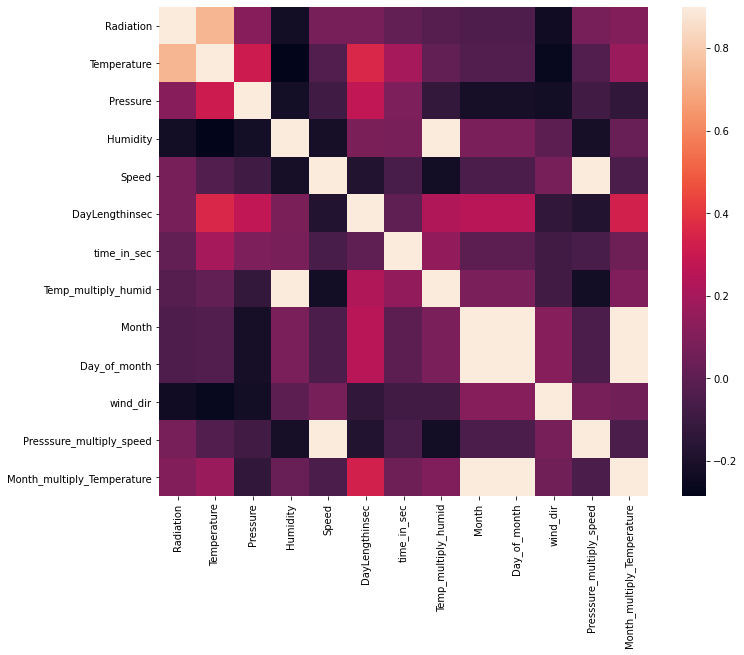

In [ ]:
#Correlation map to see how features are correlated with Radiation
corrmat = df1.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [ ]:
pclass_group=df1.groupby(['Month']).mean()
print(pclass_group)

        Radiation  ...  Month_multiply_Temperature
Month              ...                            
0      219.594049  ...                    0.000000
1      306.661786  ...                   54.632143
2      296.646761  ...                  110.211268
3      274.744085  ...                  161.091549
4      305.690707  ...                  225.045936
...           ...  ...                         ...
113    306.065125  ...                 6011.519573
114    310.643781  ...                 5938.473498
115    151.374677  ...                 5663.034826
116     25.105563  ...                 5284.535211
117     19.137236  ...                 5321.121951

[118 rows x 12 columns]


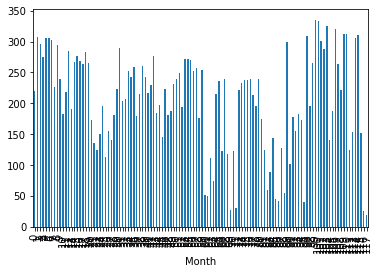

In [ ]:
pclass_group['Radiation'].plot.bar()
plt.show()

In [ ]:
#We drop the following columns
df1 = df1.drop(['Time'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X=df1[['Temperature', 'Pressure', 'Humidity', 'Speed',
     'DayLengthinsec', 'time_in_sec', 'Temp_multiply_humid', 'Month',
       'wind_dir','Day_of_month']]


Y=df1.Radiation

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

In [ ]:
linreg= LinearRegression().fit(X_train, Y_train) 
print("Score: ",linreg.score(X,Y))
from sklearn.metrics import mean_squared_error
Target_predicted= linreg.predict(X_test) 
MSE=mean_squared_error(Y_test,Target_predicted) 
print('mean square error', MSE)

Score:  0.6217313911372417
mean square error 37488.19281386182


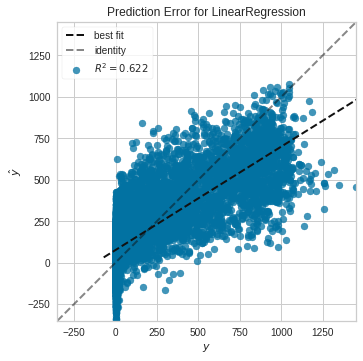

In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
model1 = LinearRegression()
visualizer = PredictionError(model1)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)  
visualizer.poof()

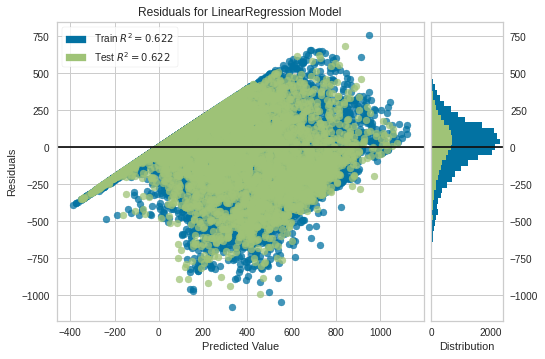

In [ ]:
visualizer = ResidualsPlot(model1)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)  
visualizer.poof()

In [ ]:
df1 = df1.drop(df1[(df1['Radiation']>1400)].index)

In [ ]:
df1 = df1.drop(df1[(df1['wind_dir']>8000)].index)

In [ ]:
df1 = df1.drop(df1[(df1['Speed']>35)].index)

In [ ]:
df1 = df1.drop(df1[(df1['Radiation']>1300)].index)

In [ ]:
df1 = df1.drop(df1[(df1['Radiation']>1200)].index)

In [ ]:
print(df1.shape)

(32628, 13)


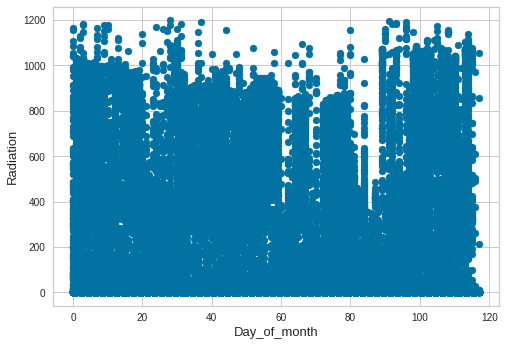

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Day_of_month'], y = df1['Radiation'])
plt.ylabel('Radiation', fontsize=13)
plt.xlabel('Day_of_month', fontsize=13)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [ ]:
sub = pd.DataFrame()
sub = sub.reset_index()
sub['Radiation'] = Target_predicted
sub.to_csv('submission.csv',index=False)

In [ ]:
print(df1.shape)

(32628, 13)


In [ ]:
df1.to_csv("m_l_data_processed.csv")

In [ ]:
X=df1[['Temperature', 'Pressure', 'Humidity', 'Speed',
       'DayLengthinsec', 'time_in_sec', 'Temp_multiply_humid', 'Month',
       'wind_dir','Day_of_month']]
Y=df1.Radiation

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)
def model_score_error(model):
    prepared_model=model.fit(X_train, Y_train)
    x=prepared_model.score(X_test,Y_test)
    print('Score: ',x)
    Target_predicted=prepared_model.predict(X_test) 
    MSE=mean_squared_error(Y_test,Target_predicted) 
    print('mean square error', MSE)

In [ ]:
# lasso is very sensitive to outliers. so make it more robust

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=50))

In [ ]:
model_score_error(lasso)

Score:  0.6260165031797256
mean square error 36579.99384645177


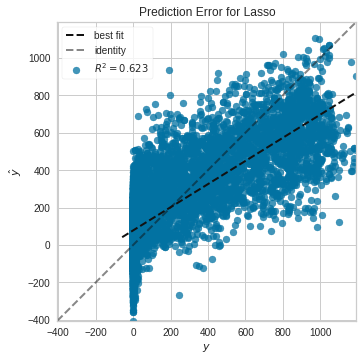

In [ ]:
model2 = Lasso()
visualizer = PredictionError(model2)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)  
visualizer.poof()

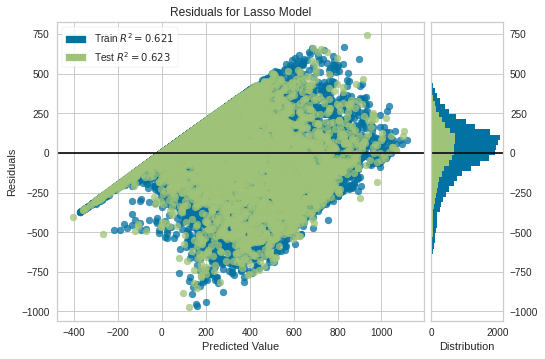

In [ ]:
model2 = Lasso()
visualizer = ResidualsPlot(model2)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)  
visualizer.poof()

In [ ]:
MLP = MLPRegressor(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [ ]:
# scores
model_score_error(MLP)

Score:  0.8234148767463496
mean square error 17272.10632799044


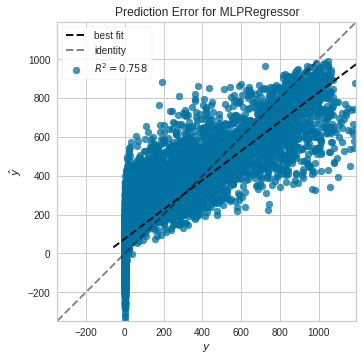

In [ ]:
#model3 = MLP()
visualizer = PredictionError(MLP)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)  
visualizer.poof()

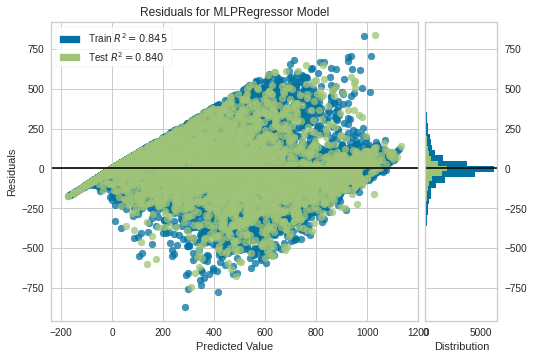

In [ ]:
visualizer = ResidualsPlot(MLP)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)  
visualizer.poof()